# Data Analysis of Apps in Google Play Store.

### Primary objective is to explore the dataset and find out various statistical insights in the Android Market. The dataset is collected from Kaggle.com containing around 10,000 records of different Play Store Apps.
#### DataSet link: https://www.kaggle.com/lava18/google-play-store-apps

In [592]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Preparation and Cleaning

In [593]:
google_data = pd.read_csv('googleplaystore.csv')
df = google_data.copy()
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [594]:
df.shape

(10841, 13)

In [595]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###  1.a Imputation of empty/null values

In [597]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Rating, Type, Content Rating, Current Ver, Android Ver contains null values. We will have a detailed look for the missing values and check unique count as well

In [598]:
def check_info():
    t1 = pd.DataFrame(index = df.columns)
    t1['data_type'] = df.dtypes
    t1['null_count'] = df.isnull().sum()
    t1['unique_count'] = df.nunique()
    return t1


In [599]:
check_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


#### Checking records for the null values in Rating

In [600]:
df[df['Rating'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [601]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### We can see that Rating has a maximum value of 19. This could be an outlier or a wrong value. We need to check before filling the missing values.

In [602]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### The record is definitely has wrong value and contains two null values as well. So decided to drop this row 10472.


In [603]:
df.drop(df.index[10472], inplace = True)
df.shape

(10840, 13)

#### To replace the missing values in Rating, we have to check the distribution of data

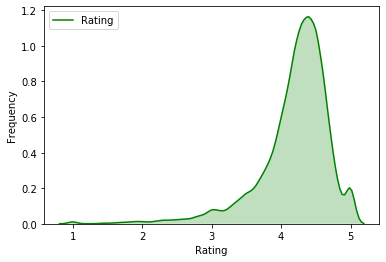

In [604]:
plt.figure(figsize=(6,4))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color = "Green", shade = True)
plt.show()

#### Since the data is Left Skewed and the data is continuous, we have replaced the missing values with median

In [605]:
k = df['Rating'].median()
print(k)
df['Rating'].fillna(value = k, inplace = True)

4.3


#### We can see Type has one missing value. We are replacing the missing value by 'Free' since it has the most value counts

In [606]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [607]:
df['Type'].fillna("Free", inplace = True)

In [608]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
2.2 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [609]:
df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
2.5.1.7592               1
2.19.6                   1
1.640                    1
2.48.3                   1
4.6.2.0                  1
Name: Current Ver, Length: 2831, dtype: int64

#### Since Both 'Android Ver' and 'Current Ver' have mixed values with range, we decided to drop this columns.

In [610]:
df.drop(['Android Ver', 'Current Ver'], axis = 1, inplace = True)

In [611]:
check_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


### 1.b Changing the DataTypes

#### Since Reviews, Size, Installs, Price are numerical features, we will convert them from object to integer.

In [612]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


#### Converting Datatype of Review

In [613]:
pd.unique(df['Reviews'])

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [614]:
df['Reviews'] = df['Reviews'].astype(int)

#### Converting datatype of Size

In [615]:
pd.unique(df['Size'])

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [616]:
df['Size'] = df['Size'].apply(lambda x: x.replace('M', 'e+6')) # Converting Megabytes(Mb) to Bytes
df['Size'] = df['Size'].apply(lambda x: x.replace('k', 'e+3')) # Converting Kilobytes(Kb) to Bytes
df['Size'] = df['Size'].replace('Varies with device', np.NaN) # Converting to null


In [617]:
df['Size'] = pd.to_numeric(df['Size'])

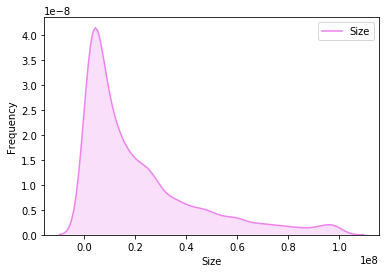

In [618]:
plt.figure(figsize=(6,4))
plt.xlabel("Size")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Size, color = "Violet", shade = True)
plt.show()

#### The distribution is RightSkewed, hence we fill the null values with the median

In [619]:
t = df['Size'].median()
print(t)
df['Size'].fillna(value = t, inplace = True)

13000000.0


In [620]:
check_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,0,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


#### Converting DataType of Installs

In [621]:
pd.unique(df['Installs'])

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [622]:
df['Installs'] = df['Installs'].apply(lambda x: x.strip("+")) # Stripping out'+' symbol
df['Installs'] = df['Installs'].apply(lambda x: x.replace(",","")) # Replacing ',' symbol
df['Installs'] = pd.to_numeric(df['Installs'])

In [623]:
df['Installs'].dtypes

dtype('int64')

#### Converting DataType of Price

In [624]:
pd.unique(df['Price'])

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [625]:
df['Price'] = df['Price'].apply(lambda x: x.strip("$")) # Stripping out'+' symbol
df['Price'] = pd.to_numeric(df['Price'])

In [626]:
df['Price'].dtypes

dtype('float64')

In [627]:
check_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


In [628]:
sam = df.sample(n = 10)
sam

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8471,Eyewitness Travel Phrase Book,FAMILY,3.8,10,25000000.0,1000,Free,0.00,Everyone,Education,"July 28, 2017"
7587,CN Sayin' - Cartoon Network,FAMILY,4.5,85,25000000.0,10000,Free,0.00,Everyone,Entertainment,"March 27, 2018"
5325,Al Quran Al karim,BOOKS_AND_REFERENCE,4.6,41608,49000000.0,1000000,Free,0.00,Everyone,Books & Reference,"November 5, 2017"
8723,DRAGON QUEST,FAMILY,4.2,9659,30000000.0,100000,Paid,2.99,Everyone,Role Playing,"March 10, 2017"
7906,Service CU Mobile Banking,FINANCE,4.7,6208,14000000.0,100000,Free,0.00,Everyone,Finance,"June 12, 2018"
9772,Get SMART ER/LA Opioids,MEDICAL,4.3,0,8900000.0,500,Free,0.00,Everyone,Medical,"April 26, 2018"
2392,GlassesOff,MEDICAL,3.5,1288,38000000.0,100000,Free,0.00,Everyone,Medical,"July 10, 2018"
10741,Fingerprint Quick Action,TOOLS,4.2,8484,1700000.0,1000000,Free,0.00,Everyone,Tools,"July 22, 2018"
2270,ERres- Emergency Medicine,MEDICAL,4.2,45,14000000.0,1000,Paid,4.99,Everyone,Medical,"August 18, 2015"
5806,Stickman and Axe,GAME,4.4,69,2800000.0,50000,Free,0.00,Teen,Action,"November 25, 2017"


In [629]:
pd.unique(df['Content Rating'])

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Checking for Duplicated Rows

In [630]:
df.duplicated().any()

True

In [631]:
df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
8 Ball Pool                                          7
                                                    ..
Video Downloader for Facebook                        1
BeSoccer - Soccer Live Score                         1
ClickMeeting Webinars                                1
BG video - floating video - background video         1
The green alien dance                                1
Name: App, Length: 9659, dtype: int64

In [632]:
df[df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1653,ROBLOX,GAME,4.5,4447388,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1701,ROBLOX,GAME,4.5,4447346,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1748,ROBLOX,GAME,4.5,4448791,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1841,ROBLOX,GAME,4.5,4449882,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1870,ROBLOX,GAME,4.5,4449910,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
2016,ROBLOX,FAMILY,4.5,4449910,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
2088,ROBLOX,FAMILY,4.5,4450855,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
2206,ROBLOX,FAMILY,4.5,4450890,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
4527,ROBLOX,FAMILY,4.5,4443407,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"


#### As we can see,  "ROBLOX" falls under two differnt categories with the count of reviews different for each record. This might be due to scrapping of data at different intervals. So we have decided to keep the App whose Review has the highest value

In [633]:
df.drop_duplicates(inplace = True)

In [634]:
df = df.loc[df.groupby(['App'])['Reviews'].idxmax()]

In [635]:
df[df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2206,ROBLOX,FAMILY,4.5,4450890,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"


#### So the final Data Set contains 11 columns and 9659 rows

In [636]:
df.shape

(9659, 11)

In [637]:
daf = df.copy()

In [638]:
#df.to_csv("Ready_For_EDA.csv", index = False)
#df.to_csv("D:\Praxis Docs\googleplaystore.csv\Ready_For_EDA_1.csv", index = False)

# 2. Exploratory Data Analysis and Visualization

In [639]:
df1 = pd.read_csv("Ready_For_EDA.csv")

In [640]:
df1.sample(n = 6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
5189,Hilverda De Boer B.V. App,SHOPPING,4.3,5,19000000.0,500,Free,0.0,Everyone,Shopping,"February 2, 2018"
6982,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400000.0,10000000,Free,0.0,Everyone,Photography,"June 3, 2017"
9091,Wifi Connect Library,LIBRARIES_AND_DEMO,3.9,58055,41000.0,5000000,Free,0.0,Everyone,Libraries & Demo,"November 7, 2016"
6272,Modern Counter Terrorist FPS Shoot,GAME,4.0,795,41000000.0,100000,Free,0.0,Teen,Action,"August 29, 2017"
4086,Ez Screen Recorder (no ad),VIDEO_PLAYERS,4.7,8696,14000000.0,100000,Free,0.0,Everyone,Video Players & Editors,"June 3, 2018"
4229,FK Sloboda Tuzla,SPORTS,4.3,0,26000000.0,10,Free,0.0,Everyone,Sports,"February 20, 2018"


In [641]:
df1.shape

(9659, 11)

In [642]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9.659000e+03,9659.000000
mean,4.192463,2.168041e+05,1.945786e+07,7.798170e+06,1.097231
std,0.496055,1.831430e+06,2.054211e+07,5.376973e+07,16.851618
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000e+06,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


### 2.a Top Category in Google Play Store (With Respect to Apps)

In [643]:
y_val = df1['Category'].value_counts().index
x_val = df1['Category'].value_counts()
x_grph = []
y_grph = []
for i in range(len(x_val)):
    x_grph.append(x_val[i])
    y_grph.append(y_val[i])

Text(0.5, 1.0, ' Top Category in Google Play Store')

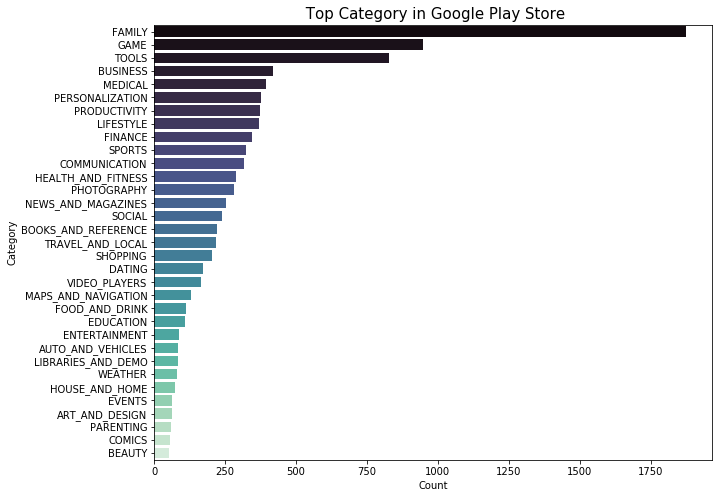

In [644]:
plt.figure(figsize=(10,8))
plt.xlabel("Count")
plt.ylabel("Category")
graph = sns.barplot(x = x_grph, y = y_grph, palette = "mako")
graph.set_title(" Top Category in Google Play Store", fontsize = 15)

#### There are total 33 Category in Google Play Store as provided in the dataset. We can see most of the apps fall under Family and Game category where as the least falls under Comics and Beauty.

### 2.b Most Installs of App Category

In [645]:
most_install = df1.groupby('Category')[['Installs']].sum().sort_values(by = 'Installs', ascending = False)

In [646]:
most_install.head()

,Installs
Category,
GAME,13457924415
COMMUNICATION,11038276251
TOOLS,8102771915
FAMILY,6221541505
PRODUCTIVITY,5793091369


In [647]:
x_inst =[]
y_inst =[]
for i in range (len(most_install)):
    x_inst.append(most_install.Installs[i])
    y_inst.append(most_install.index[i])  

Text(0.5, 1.0, ' Installs of Different Category')

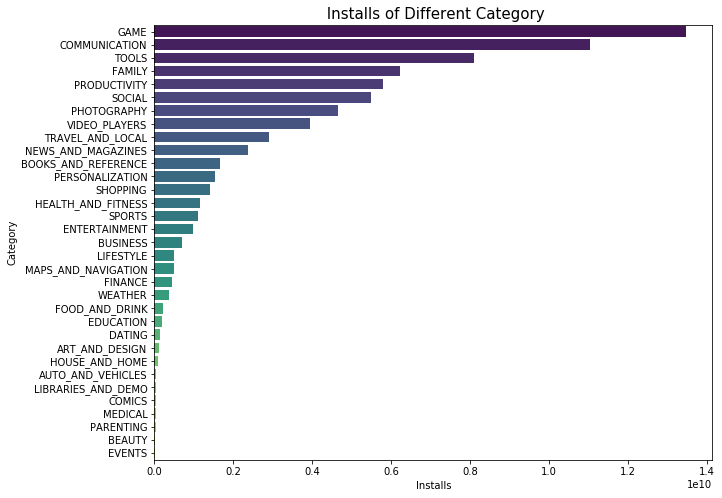

In [648]:
plt.figure(figsize=(10,8))
plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x_inst, y = y_inst, palette = "viridis")
graph.set_title(" Installs of Different Category", fontsize = 15)

#### An interisting insight we can see that though Family category leads in numbers but with respect to number of downloads/installs Game category leads followed up by Communication.

### 2.c  Top 10 Apps installed in any Category

In [649]:
df1['Genres'].replace(to_replace = "Education;Education", value = "Education", inplace = True)

In [650]:
def top_inst(str):
    str = str.upper()
    ten = df1[df1['Category'] == str]
    ten_val = ten.sort_values(by = 'Installs', ascending = False).head(10)
    val = ten_val['Genres'].value_counts()
    lab = ten_val['Genres'].value_counts().index
    plt.figure(figsize = (8,6))
    plt.pie(val, labels = lab, autopct = '%1.1f%%', startangle = 0)
    plt.title(" Distribution of Genres of Top 10", size = 15)
    return ten_val

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8079,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018"
6433,My Talking Tom,GAME,4.5,14892469,13000000.0,500000000,Free,0.0,Everyone,Casual,"July 19, 2018"
2364,Candy Crush Saga,GAME,4.4,22430188,74000000.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018"
8303,Temple Run 2,GAME,4.3,8119154,62000000.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018"
7115,Pou,GAME,4.3,10486018,24000000.0,500000000,Free,0.0,Everyone,Casual,"May 25, 2018"
7043,Plants vs. Zombies FREE,GAME,4.4,4067651,69000000.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 6, 2018"
6990,Piano Tiles 2™,GAME,4.7,8118880,13000000.0,100000000,Free,0.0,Everyone,Arcade,"August 3, 2018"
5148,Helix Jump,GAME,4.2,1500999,33000000.0,100000000,Free,0.0,Everyone,Action,"April 9, 2018"
1828,Bus Rush: Subway Edition,GAME,4.1,753043,57000000.0,100000000,Free,0.0,Teen,Action,"August 1, 2018"
5186,Hill Climb Racing,GAME,4.4,8923847,63000000.0,100000000,Free,0.0,Everyone,Racing,"July 2, 2018"


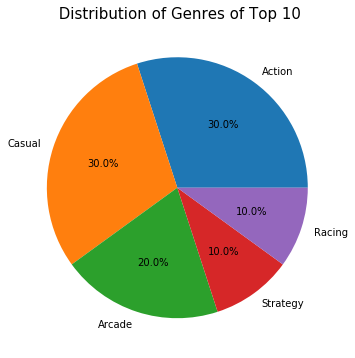

In [651]:
top_inst('Game')

### 2.d Apps with top 10 Highest Reviews

In [652]:
most_rev = df1.sort_values(by = 'Reviews', ascending = False).head(10)
most_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
4328,Facebook,SOCIAL,4.1,78158306,13000000.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018"
9041,WhatsApp Messenger,COMMUNICATION,4.4,69119316,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
5399,Instagram,SOCIAL,4.5,66577446,13000000.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018"
6165,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"
2564,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018"
2573,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,13000000.0,500000000,Free,0.0,Everyone,Tools,"August 3, 2018"
8079,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018"
9225,YouTube,VIDEO_PLAYERS,4.3,25655305,13000000.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018"
7721,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,13000000.0,500000000,Free,0.0,Everyone,Tools,"August 4, 2018"
2561,Clash Royale,GAME,4.6,23136735,97000000.0,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018"


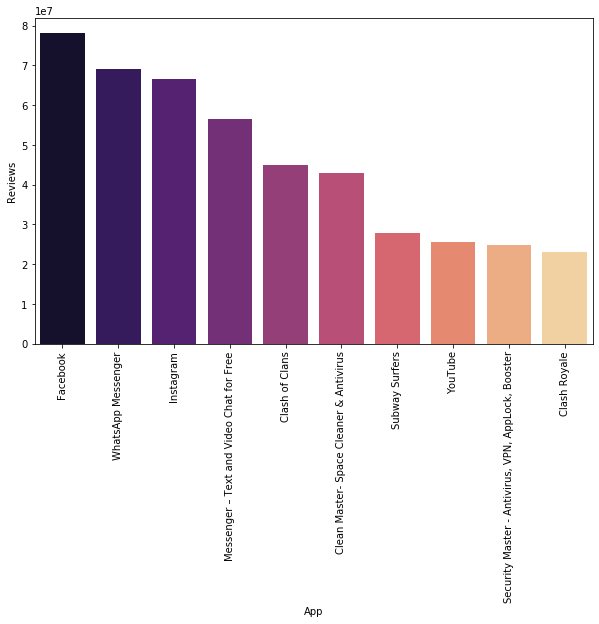

In [653]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
plt.ylabel("Reviews")
sns.barplot(most_rev['App'], most_rev['Reviews'], palette = "magma")
plt.show()

### 2.e Top 10 Reviewed apps in any category

In [654]:
def top_rev(str):
    str = str.upper()
    ten = df1[df1['Category'] == str]
    ten_val = ten.sort_values(by = 'Reviews', ascending = False).head(10)
    val = ten_val['Genres'].value_counts()
    lab = ten_val['Genres'].value_counts().index
    plt.figure(figsize = (10,6))
    plt.xticks(rotation = 90)
    plt.ylabel("Reviews")
    sns.barplot(ten_val['App'], ten_val['Reviews'], palette = "viridis")
    plt.show()
    return ten_val

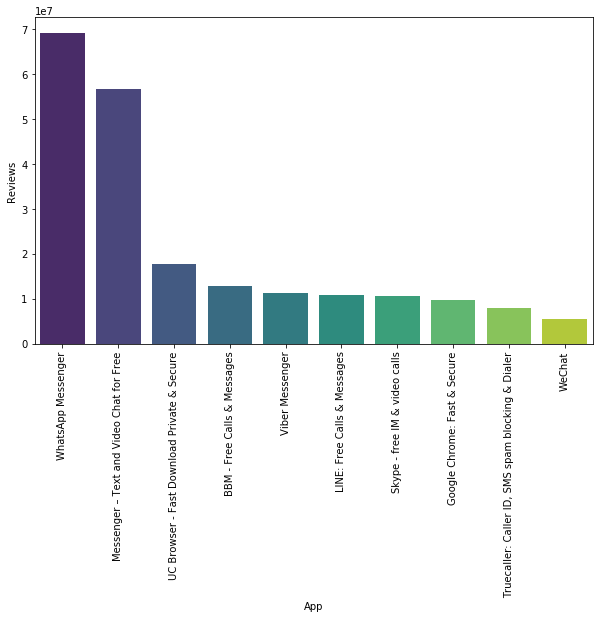

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9041,WhatsApp Messenger,COMMUNICATION,4.4,69119316,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
6165,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"
8672,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40000000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018"
966,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,13000000.0,100000000,Free,0.0,Everyone,Communication,"August 2, 2018"
8815,Viber Messenger,COMMUNICATION,4.3,11335481,13000000.0,500000000,Free,0.0,Everyone,Communication,"July 18, 2018"
5672,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,13000000.0,500000000,Free,0.0,Everyone,Communication,"July 26, 2018"
7844,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
4921,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"
8614,"Truecaller: Caller ID, SMS spam blocking & Dialer",COMMUNICATION,4.5,7820775,13000000.0,100000000,Free,0.0,Everyone,Communication,"August 1, 2018"
8983,WeChat,COMMUNICATION,4.2,5387631,13000000.0,100000000,Free,0.0,Everyone,Communication,"July 31, 2018"


In [655]:
top_rev("Communication")

### 2.f Top 10 Paid Apps

In [656]:
paid = df1[df1['Type'] == "Paid"]
paid.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3800000.0,100,Paid,1.49,Everyone,Communication,"May 12, 2018"
10,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3500000.0,500,Paid,0.99,Everyone,Books & Reference,"August 30, 2013"
19,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1400000.0,1000,Paid,3.08,Everyone,Books & Reference,"May 27, 2016"
23,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3500000.0,100,Paid,1.49,Everyone,Communication,"March 5, 2018"
29,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3800000.0,1000,Paid,16.99,Everyone,Medical,"January 27, 2017"


In [657]:
earn = paid[['App','Installs','Price','Genres','Category']]
earn['Earnings in $'] = earn['Price'] * earn['Installs']
top_earn = earn.sort_values(by = 'Earnings in $', ascending = False).head(10)
top_earn

C:\Users\Avirup Saha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Installs,Price,Genres,Category,Earnings in $
6211,Minecraft,10000000,6.99,Arcade;Action & Adventure,FAMILY,69900000.0
5321,I am rich,100000,399.99,Lifestyle,LIFESTYLE,39999000.0
5301,I Am Rich Premium,50000,399.99,Finance,FINANCE,19999500.0
5197,Hitman Sniper,10000000,0.99,Action,GAME,9900000.0
4960,Grand Theft Auto: San Andreas,1000000,6.99,Action,GAME,6990000.0
7853,Sleep as Android Unlock,1000000,5.99,Lifestyle,LIFESTYLE,5990000.0
4337,Facetune - For Free,1000000,5.99,Photography,PHOTOGRAPHY,5990000.0
3432,DraStic DS Emulator,1000000,4.99,Action,GAME,4990000.0
5327,I'm Rich - Trump Edition,10000,400.00,Lifestyle,LIFESTYLE,4000000.0
5317,I am Rich Plus,10000,399.99,Entertainment,FAMILY,3999900.0


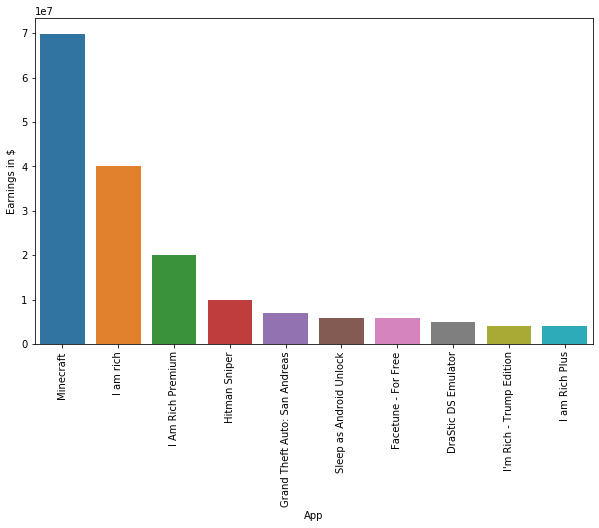

In [658]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
plt.ylabel("Earnings in $")
sns.barplot(top_earn['App'], top_earn['Earnings in $'])
plt.show()

#### It is observed that Minecraft under Family Category has the highest earning of 69.9 Million USD with 10 million downloads and next I am rich has earning of approx 40 miilion USD. It can be said keeping the name of the App "I am rich" will not make you rich otherwise

### 2.g Top 5 Apps of Last 3  Years (2016 - 2018)

In [659]:
df1["Year of Update"] = df1["Last Updated"].str[-4:]

In [660]:
sorted(df1["Year of Update"].unique())
year = ["2016", "2017", "2018"]
yr = df1.loc[df1["Year of Update"].isin(year)]

In [661]:
top_f = yr.sort_values(["Year of Update", "Installs"], ascending = False).groupby("Year of Update").head(5)

In [662]:
top_f

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year of Update
4328,Facebook,SOCIAL,4.1,78158306,13000000.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",2018
4869,Gmail,COMMUNICATION,4.3,4604483,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",2018
4912,Google,TOOLS,4.4,8033493,13000000.0,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",2018
4921,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,13000000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",2018
4924,Google Drive,PRODUCTIVITY,4.4,2731211,13000000.0,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",2018
2297,Calculator,TOOLS,4.3,40770,13000000.0,100000000,Free,0.0,Everyone,Tools,"November 21, 2017",2017
4828,Geometry Dash Lite,GAME,4.5,6181640,58000000.0,100000000,Free,0.0,Everyone,Arcade,"December 22, 2017",2017
4934,Google Now Launcher,TOOLS,4.2,857215,7900000.0,100000000,Free,0.0,Everyone,Tools,"December 7, 2017",2017
6957,Photo Collage Editor,PHOTOGRAPHY,4.2,1028637,13000000.0,100000000,Free,0.0,Everyone,Photography,"December 21, 2017",2017
6966,Photo Editor Pro,PHOTOGRAPHY,4.3,1871421,13000000.0,100000000,Free,0.0,Everyone,Photography,"December 21, 2017",2017


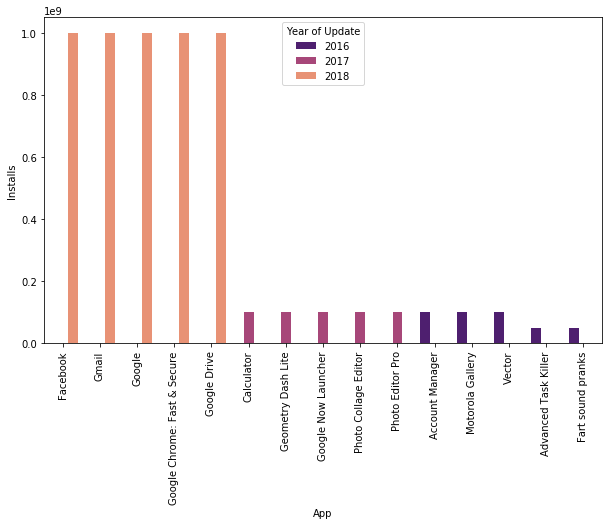

In [663]:
plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
plt.ylabel("Reviews")
sns.barplot(top_f['App'], top_f['Installs'], hue = top_f['Year of Update'], palette = "magma")
plt.show()

#### We can see for every year, the number of most installs remains same for different apps but for year 2018, the installs numbers has increased to almost 10 times with respect to 2017 and 2016. Also an interesting insight is that out of the 5 most downloaded apps in 2018, 4 are apps of Google. 

### 2.h Number of Installs in each Category with respect to Type(Free/Paid)

In [664]:
type_to = df1.groupby(['Category','Type'])[["Installs"]].sum().reset_index()
type_to["Log_Installs"] = np.log2(type_to["Installs"])  # Since Installs range is high, we did log transformation
type_to

,Category,Type,Installs,Log_Installs
0,ART_AND_DESIGN,Free,113222100,26.754580
1,ART_AND_DESIGN,Paid,16000,13.965784
2,AUTO_AND_VEHICLES,Free,53080061,25.661667
3,AUTO_AND_VEHICLES,Paid,50150,15.613962
4,BEAUTY,Free,27197050,24.696947
...,...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,183060,17.481957
59,VIDEO_PLAYERS,Free,3931831720,31.872554
60,VIDEO_PLAYERS,Paid,71000,16.115531
61,WEATHER,Free,360288520,28.424577


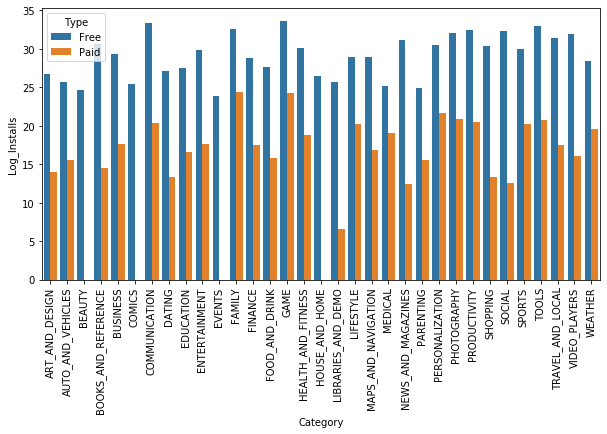

In [665]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.barplot("Category", "Log_Installs", hue = "Type", data = type_to)
plt.show()

#### For every Category, that the number of free applications that users install is higher than that of paid applications. The categories of Communication, Game and Tools have the most Free Installs. The Game category also has the most paid installs as well along with Family.

### 2.i Size impact on the number of installs of any application

In [666]:
size = df1[[ "Type", "Size", "Installs"]]
size["Log_Installs"] = np.log2(size["Installs"])
size.sample(n=6)

C:\Users\Avirup Saha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Type,Size,Installs,Log_Installs
1758,Free,6000000.0,50000,15.609640
5305,Free,4200000.0,1000000,19.931569
9445,Free,2800000.0,10000,13.287712
5309,Free,3500000.0,100000,16.609640
263,Paid,30000000.0,10,3.321928
1603,Free,87000000.0,5000,12.287712


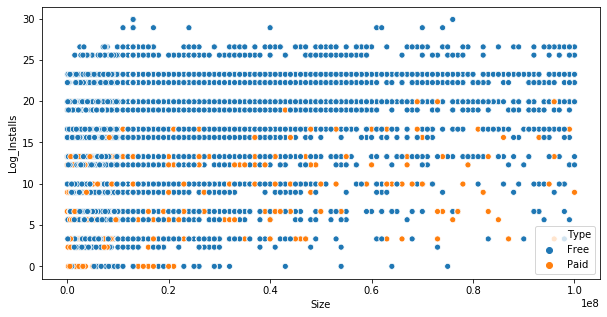

In [667]:
plt.figure(figsize=(10,5))
sns.scatterplot("Size", "Log_Installs", hue = "Type", data = size )
plt.show()

#### For Free Apps, people are installing even if the size is high, but for Paid apps high size leads to less number of installs.

### 2.j Distribution of App and Category with respect to Content Rating

In [668]:
df1["Content Rating"].unique()

array(['Everyone', 'Mature 17+', 'Everyone 10+', 'Teen', 'Unrated',
       'Adults only 18+'], dtype=object)

Text(0.5, 1.0, ' Distribution of Content Rating ')

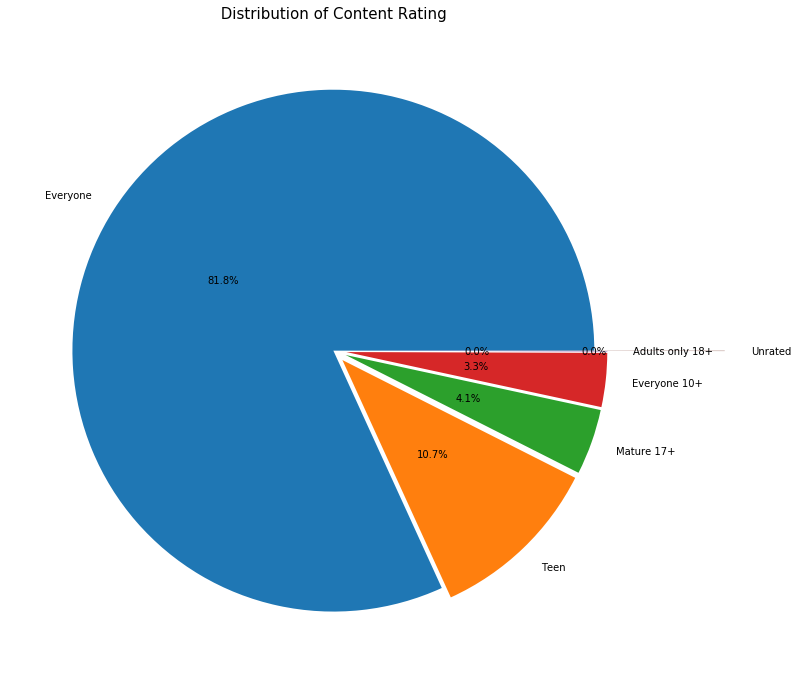

In [669]:
dis = df1["Content Rating"].value_counts()
lab1 = df1["Content Rating"].value_counts().index
exp = (0.0,0.05,0.05,0.05,0.05,0.5)
plt.figure(figsize =(15,12))
plt.pie(dis, labels = lab1, autopct = '%1.1f%%', explode = exp ,startangle = 0 , pctdistance=0.5)
plt.title(" Distribution of Content Rating ", size = 15)

#### Most of the Apps have Content Rating for Everyone

### 2.k Correlation Matrix

Text(0.5, 1, 'Correlation Matrix')

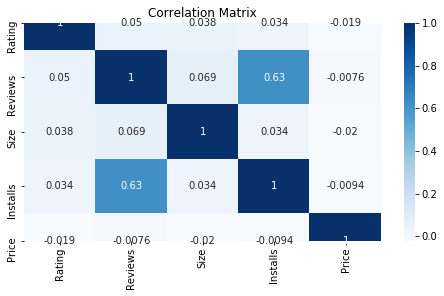

In [686]:
plt.figure(figsize=(8,4))
plt.xticks(rotation = 90)
sns.heatmap(df1.corr(), cmap = "Blues", annot = True)
plt.title('Correlation Matrix')

#### Reviews and Number of Installs is most positively Correlated